In [1]:
from IPython.display import Image
i = Image(filename='uber3.jpeg')
schema=Image(filename='KATEGORIE WYBRANE.jpg')

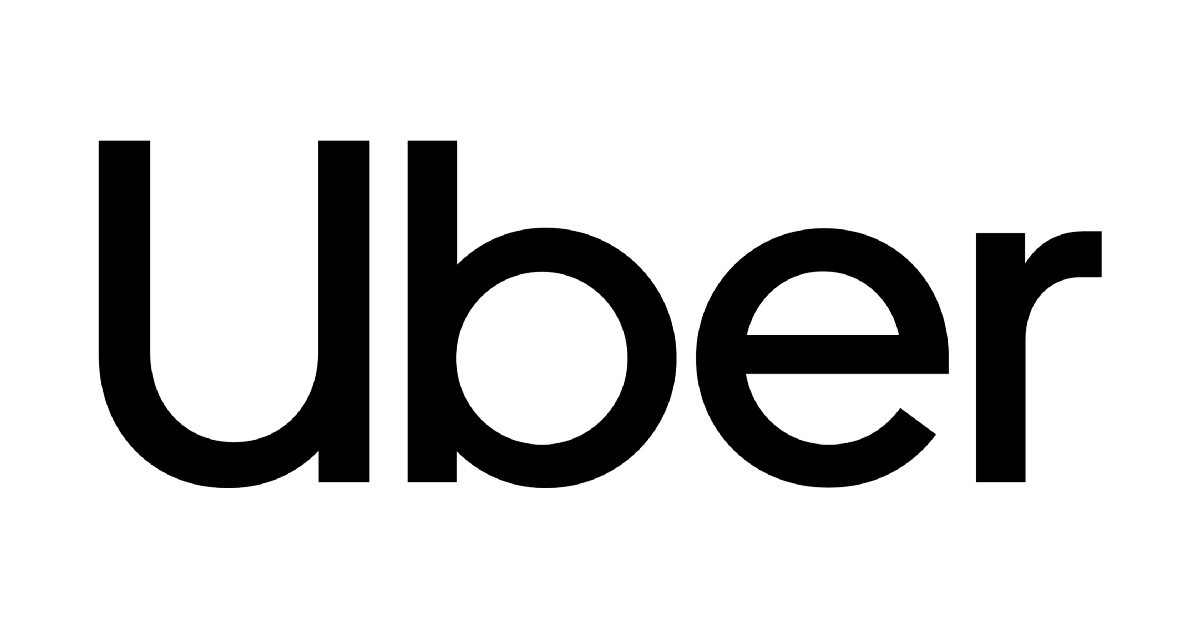

In [2]:
i

In [ ]:
## Do jakiego Ubera nie wsiadać
### Określenie najbezpieczniejszych pojazdów oraz sytuacji, w których dany pojazd przekracza granicę bezpieczeństwa


Celem projektu jest identyfikacja pojazdów, kierowców i miejsc w samochodzie pod kątem najbezpieczniejszych przejazdów.

● https://www.kaggle.com/cfurby243/fatalityfacts 
 
    
Team members:
- Monika Janicka
- Tomasz Kamiński
- Artur Kłapciński
- Elżbieta Kondracka-Zwolska

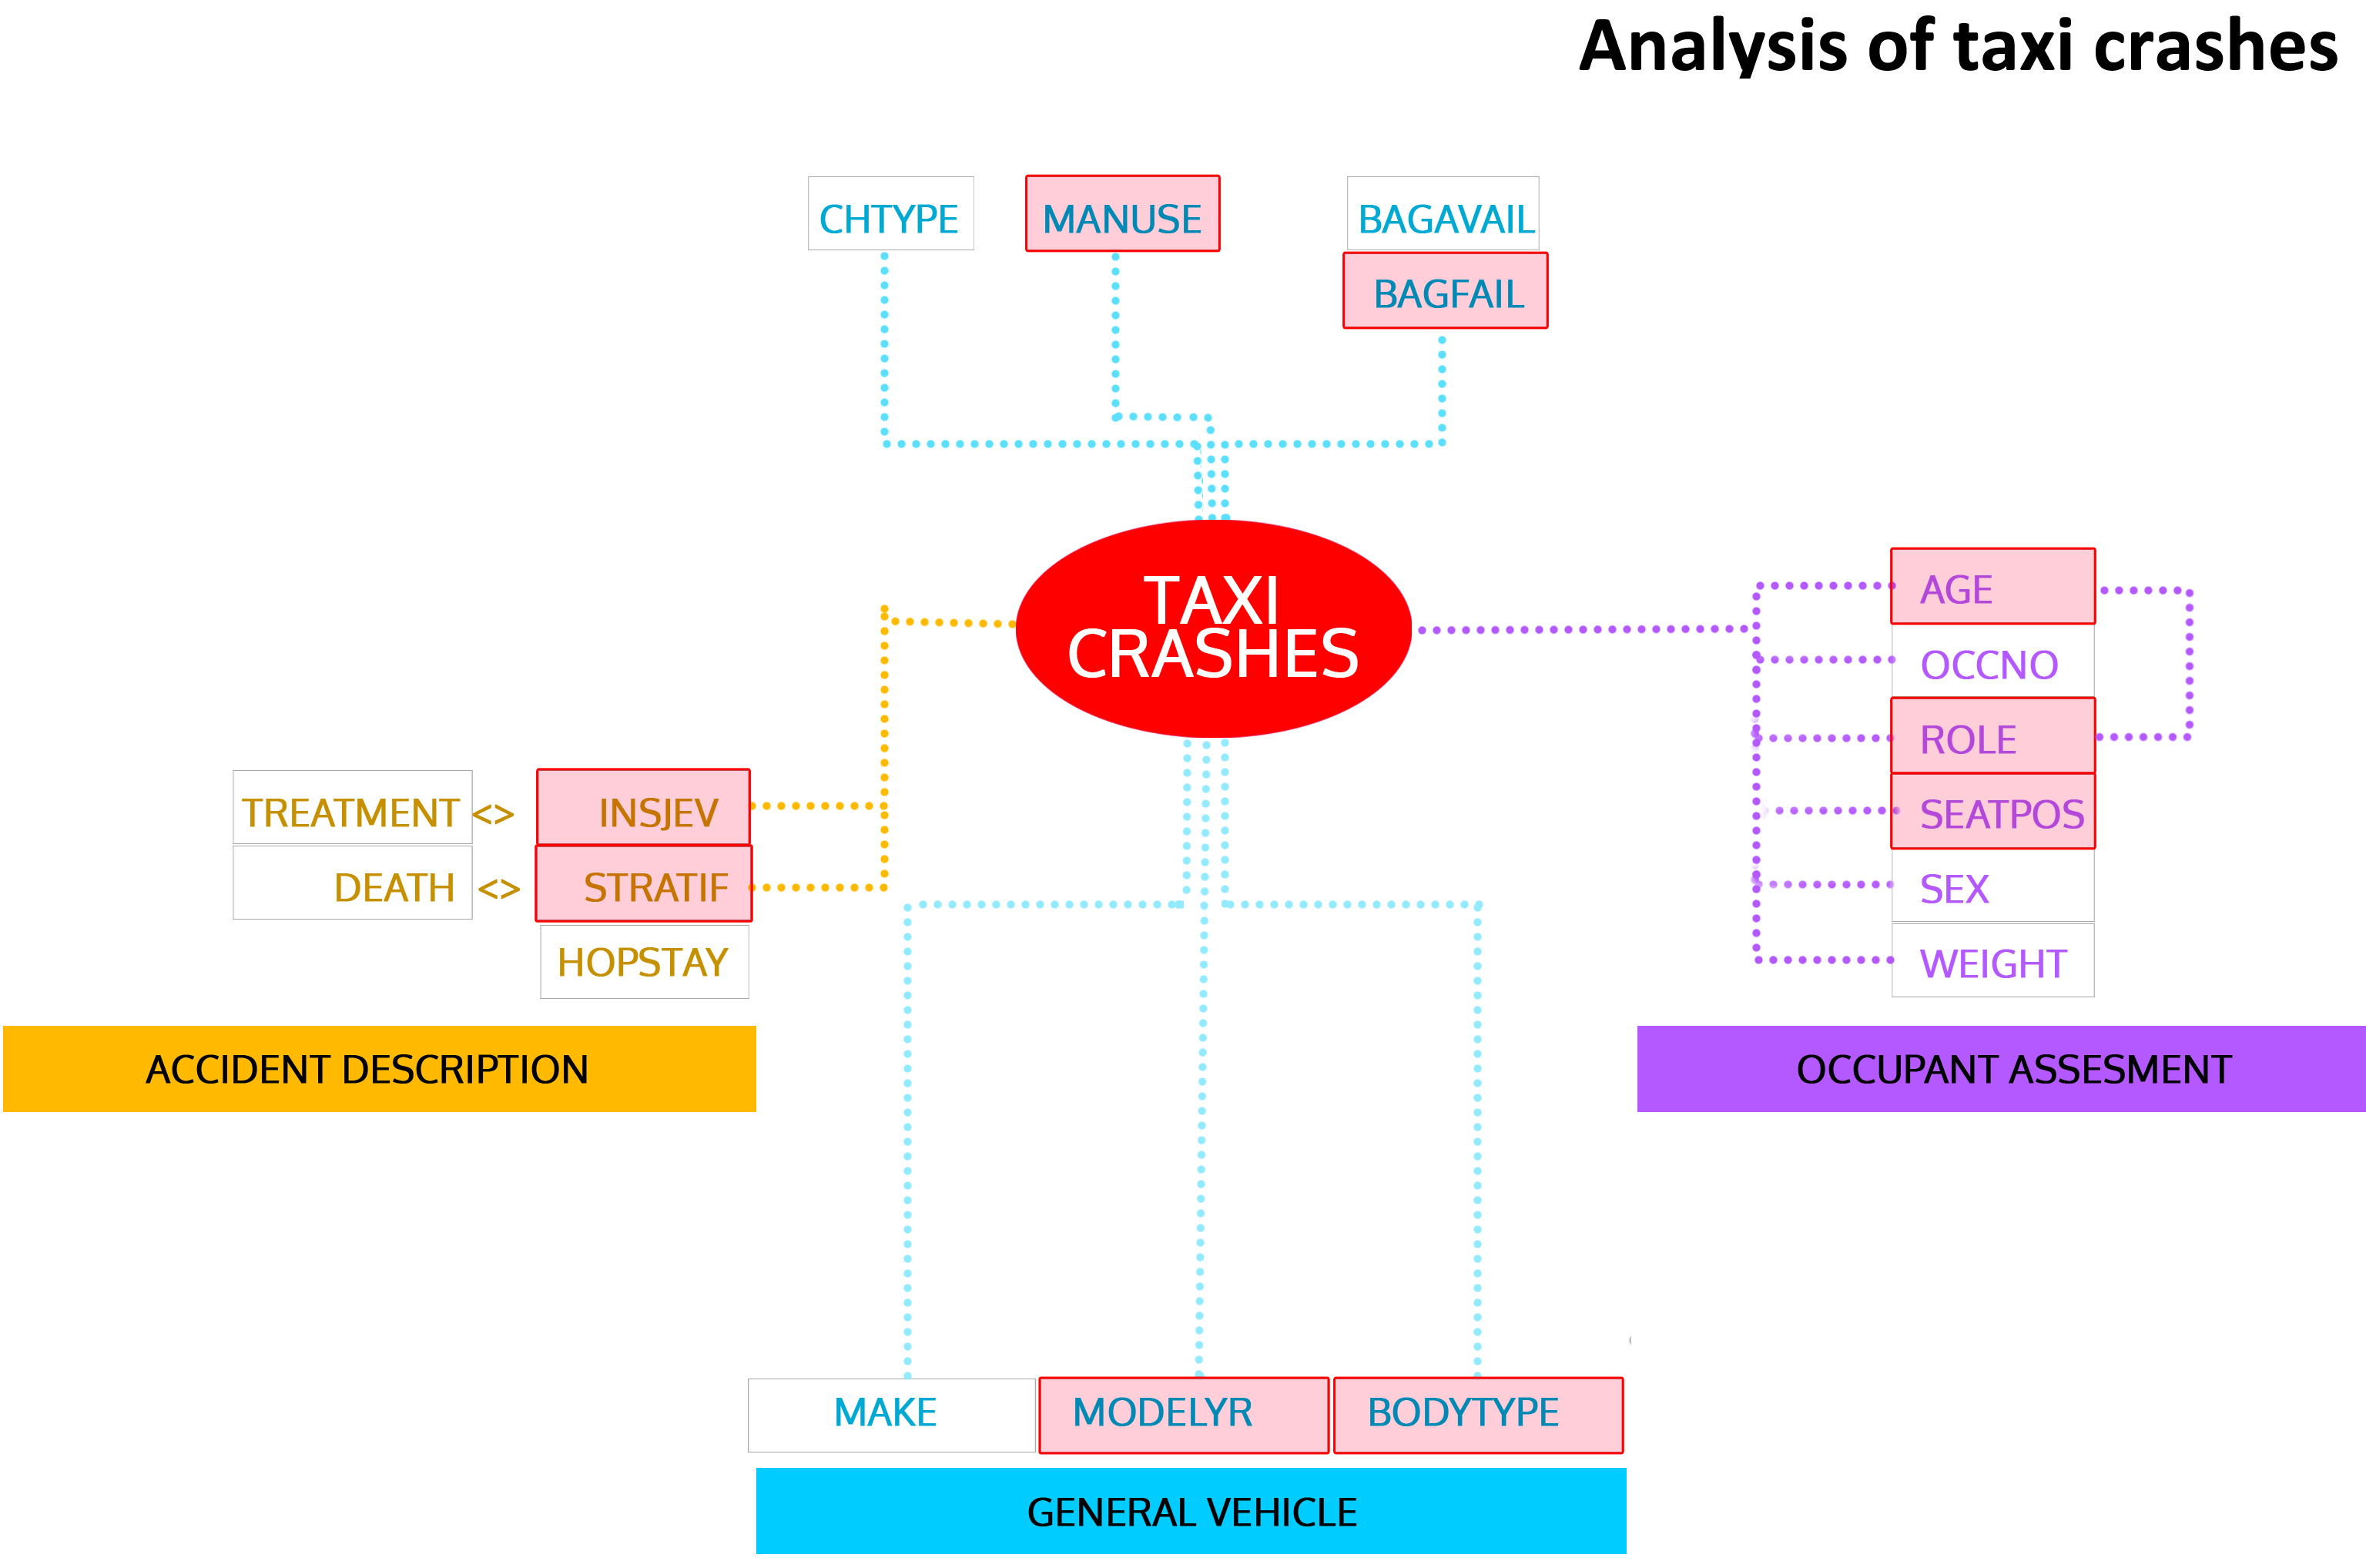

In [3]:
schema

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import seaborn as sns
import datetime
import ipywidgets as widgets

In [5]:
# biblioteki scikit-learn
from sklearn.model_selection import train_test_split # podział na zbiór testowy i treningowy
from sklearn.metrics import mean_squared_error # funkcja obliczająca metrykę
from sklearn.tree import DecisionTreeRegressor # estymator regresji=regresor
from sklearn.preprocessing import LabelEncoder # funkcja do kodowania etykiet na liczby całkowite
from sklearn.model_selection import GridSearchCV # funkcja przeszukiwania przestrzeni parametrów i walidacji krzyżowej

In [6]:
import math
x = float('nan')
math.isnan(x)

True

In [7]:
# link do folderu z GITA:
%cd "D:\GIT HUBy\02code brakers\jdszr7-code-breakers\projekt python"

[WinError 3] System nie może odnaleźć określonej ścieżki: 'D:\\GIT HUBy\\02code brakers\\jdszr7-code-breakers\\projekt python'
C:\Users\XPS\Desktop\JDSZR7\jdszr7-code-breakers\projekt python


In [8]:
# link do folderu z GITA:
%cd "D:\PYTHON UBER"

[WinError 2] Nie można odnaleźć określonego pliku: 'D:\\PYTHON UBER'
C:\Users\XPS\Desktop\JDSZR7\jdszr7-code-breakers\projekt python


### Aby dane były bardziej przejrzyste i by uniknąć duplikatów podzieliliśmy je na trzy tabele połączone kluczami głównymi CASEID, PSU i YEAR.
### Następnie dla wartości w poszczególnych tabelach przypisaliśmy kategorie.

Najważniejsze kategorie:

    Tabela 1 OCCUPANTS - 14 kolumn   Tabela 2 VEHICLES - 6 kolumn    Tabela 3 ACCIDENTS - 4 kolumny
        
      AGE - wiek uczestnika           BODYTYPE - Typ pojazdu         STRATIF - ciężkość wypadków
        1 -  0-17 lat                  1 - samochody osobowe       1 - A, B – śmiertelne obrażenia 
        2 - 18-25 lat                  2 - większe osobowe         2 - J, K – poważne obrażenia
        3 - 26-30 lat                  3 - busy                    3 - C, D – poważne obrażenia – nie hospitalizowany
        4 - 31-50 lat                  4 - dostawcze               4 - E, F – niewielkie obrażenia, przewóz do szpitala
        5 - 51-70 lat                  5 - ciężarowki              5 - G, H – niewielkie obrażenia
        6 - 71 <= lat                  6 - motory
                                       7 - pozostałe
                                    
     ROLE - rola uczestnika            CARAGE
      1 - kierowca                   1 - 0-1 rok
      2 - pasażer                    2 - 2-3 lata
                                     3 - 4-7 lat
                                     4 - 8-12 lat
                                     5 - 13-16 lat
                                     6 - powyżej 17 lat
    BAGFAIL - awaria poduszki pow.
    0 - brak poduszki
    1 - brak awarii 
    2 - awaria 

    MANUSE - pasy bezpieczeństwa
    1 - niezapięte 
    2 - zapięte 

In [9]:
dfo=pd.read_csv("occupants_cat_z_bagfail.csv")

In [10]:
dfo.groupby(['YEAR','BAGFAIL'])['INJSEV','BAGFAIL'].count()

C:\Users\XPS\AppData\Local\Temp/ipykernel_10700/2905529609.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dfo.groupby(['YEAR','BAGFAIL'])['INJSEV','BAGFAIL'].count()


INJSEV  BAGFAIL
YEAR BAGFAIL                 
2004 0.0        3861     4042
     1.0        6266     6425
     2.0          40       40
2005 0.0        2888     3021
     1.0        5175     5322
     2.0          27       28
2006 0.0        2948     3089
     1.0        5803     6016
     2.0          22       22
2007 0.0        2596     2695
     1.0        5906     6100
     2.0          15       16
2008 0.0        2259     2401
     1.0        6461     6693
     2.0          14       14
2009 0.0         840      877
     1.0        4750     4933
     2.0          14       14
2010 0.0         693      744
     1.0        4141     4286
     2.0           9        9
2011 0.0         435      476
     1.0        3590     3754
     2.0           5        5
2012 0.0         349      364
     1.0        2476     2565
     2.0           7        7
2013 0.0         281      293
     1.0        2430     2511
     2.0           6        6
2014 0.0         177      194
     1.0        2286     2379
     2.0           5        5
2015 0.0         148      155
     1.0        1895     1988

In [11]:
bgfq=pd.read_csv("./BAGFAIL_Q.csv",sep=';')
bgfq.head(10)

YEAR  BAGFAIL  BAGFAIL_Q
0  2004      0.0       4042
1  2004      1.0       6425
2  2004      2.0         40
3  2005      0.0       3021
4  2005      1.0       5322
5  2005      2.0         28
6  2006      0.0       3089
7  2006      1.0       6016
8  2006      2.0         22
9  2007      0.0       2695

In [12]:
yearly_bagfail=dfo.groupby(["BAGFAIL"])['BAGFAIL'].count()/dfo.shape[0]
yearly_bagfail

BAGFAIL
0.0    0.165684
1.0    0.478264
2.0    0.001499
Name: BAGFAIL, dtype: float64

In [13]:
def categorise_injsev(row):  
    if row['INJSEV'] == 0.0:
        return 'no injury'
    elif row['INJSEV'] == 1.0:
        return 'small injury'
    elif row['INJSEV'] == 2.0:
        return 'large injury'
    elif row['INJSEV'] == 4.0:
        return 'killed'
    
def categorise_bagfail(row):  
    if row['BAGFAIL'] == 0.0:
        return 'no airbag'
    elif row['BAGFAIL'] == 1.0:
        return 'no failure'
    elif row['BAGFAIL'] == 2.0:
        return 'failure'
    
dfo['Injury Severity'] = dfo.apply(lambda row: categorise_injsev(row), axis=1)
bgfq['Airbag System Failure'] = bgfq.apply(lambda row: categorise_bagfail(row), axis=1)

In [14]:
ZERO = dfo.query('INJSEV == 0')['CASEID'].count()
JEDEN = dfo.query('INJSEV == 1')['CASEID'].count()
DWA = dfo.query('INJSEV == 2')['CASEID'].count()
#TRZY = dfo.query('INJSEV == 3')['CASEID'].count()
CZTERY = dfo.query('INJSEV == 4')['CASEID'].count()
#SZE = dfo.query('INJSEV == 6')['CASEID'].count()
CZTERY
INJSEV0 = ZERO / dfo['CASEID'].count()
INJSEV1 = JEDEN / dfo['CASEID'].count()
INJSEV2 = DWA / dfo['CASEID'].count()
#INJSEV3 = TRZY / dfo['CASEID'].count()
INJSEV4 = CZTERY / dfo['CASEID'].count()
#INJSEV6 = SZE / dfo['CASEID'].count()

In [15]:
#%cd "D:\GIT HUBy\02code brakers\jdszr7-code-breakers\projekt python"
dfo=pd.read_csv("./occupants_cat_z_bagfail.csv")
plt.figure(figsize = [10, 5])
dfo['Injury Severity'] = dfo.apply(lambda row: categorise_injsev(row), axis=1)

<Figure size 720x360 with 0 Axes>

In [16]:
def injsev_countplot_pie():
# wykres slupkowy
    plt.subplot(1, 2, 1)

    g = sns.countplot(data=dfo, x="Injury Severity", order=dfo["Injury Severity"].value_counts().index)
    #g.set_xlabel('brak urazu   lekkie   umiarkowane śmiertelne')
#g.set_xlabel('Rodzaj urazu')
    g.set_ylabel('People injured count')

    plt.subplots_adjust(left=0.0, right=1.0)
    
# pie chart
    plt.subplot(1, 2, 2)

    labels = ["no injury","small injury","large injury","killed"]
    sizes = [INJSEV0, INJSEV1,INJSEV2,INJSEV4]
    colors = ['steelblue', 'darkorange','GREEN','RED']
    #colours = {INJSEV0: 'steelblue',INJSEV1: 'darkorange',INJSEV2 : 'GREEN',INJSEV4 : 'RED'}
    explode = (0,0,0,0.2)

    plt.pie(sizes, explode=explode, labels=labels, colors = colors,
        autopct='%1.1f%%', shadow=True, startangle=90, normalize=False)
    plt.axis('equal')

    plt.suptitle('Przypadki i skala obrażeń', y=1.03, fontsize=18, fontweight='semibold');

# Wypadki i ich skala obrażeń

  - no injury 
  - small injury 
  - large injury 
  - killed

In [71]:
injsev_countplot_pie()

In [18]:
df_corr=pd.read_csv("./occupants_cat_z_bagfail.csv")
df_corr.head(10)

CASEID  PSU  YEAR  AGE  BAGAVAIL  BAGFAIL  CHTYPE  HEIGHT  INJSEV  MANUSE  \
0     1H    2  2004  2.0       1.0      1.0     0.0     4.0     0.0     2.0   
1     2K    2  2004  5.0       1.0      1.0     0.0     4.0     1.0     2.0   
2     2K    2  2004  5.0       1.0      1.0     0.0     4.0     1.0     2.0   
3     2K    2  2004  2.0       1.0      1.0     0.0     NaN     2.0     2.0   
4     2K    2  2004  4.0       1.0      1.0     0.0     NaN     2.0     2.0   
5     2K    2  2004  2.0       0.0      0.0     0.0     NaN     2.0     1.0   
6     3E    2  2004  4.0       1.0      1.0     0.0     4.0     0.0     2.0   
7     3E    2  2004  2.0       1.0      1.0     0.0     4.0     1.0     2.0   
8     4A    2  2004  5.0       1.0      1.0     0.0     4.0     2.0     2.0   
9     4A    2  2004  5.0       1.0      1.0     0.0     4.0     4.0     2.0   

   OCCNO  ROLE  SEATPOS  SEX  WEIGHT  HOSPSTAY  TREATMNT  STRATIF  
0    1.0   1.0      1.0  0.0     4.0       1.0       0.0      5.0  
1    1.0   1.0      1.0  0.0     5.0       1.0       4.0      2.0  
2    2.0   2.0      1.0  1.0     4.0       1.0       3.0      2.0  
3    1.0   1.0      1.0  0.0     NaN       1.0       3.0      2.0  
4    2.0   2.0      1.0  0.0     NaN       1.0       3.0      2.0  
5    3.0   2.0      2.0  0.0     NaN       1.0       4.0      2.0  
6    1.0   1.0      1.0  0.0     NaN       1.0       0.0      4.0  
7    1.0   1.0      1.0  1.0     4.0       1.0       4.0      4.0  
8    1.0   1.0      1.0  0.0     4.0       1.0       3.0      1.0  
9    2.0   2.0      1.0  1.0     4.0       1.0       1.0      1.0

In [19]:
df_corr.groupby(['YEAR'])['CASEID'].count().head(10)

YEAR
2004    12274
2005     9861
2006    10898
2007    10808
2008    10831
2009    11025
2010    10212
2011     8938
2012     7396
2013     7083
Name: CASEID, dtype: int64

In [20]:
cases_df = df_corr.groupby(["YEAR"])["CASEID"].count().reset_index()
cases_df = cases_df.rename(columns={"CASEID": "Liczba wypadków", "YEAR": "Rok"})
cases_df

Rok  Liczba wypadków
0   2004            12274
1   2005             9861
2   2006            10898
3   2007            10808
4   2008            10831
5   2009            11025
6   2010            10212
7   2011             8938
8   2012             7396
9   2013             7083
10  2014             5955
11  2015             5478

In [21]:
def regplot_cases():
    g=sns.lmplot(data=cases_df,
                x="Rok",
                y="Liczba wypadków", 
                aspect=2,
                ).set(title='Liczna wypadków w roku')
    plt.xlabel('Year')
    plt.ylabel('Count of Accidents')

# Jak przedstawiała się liczba wypadków w poszczególnych latach

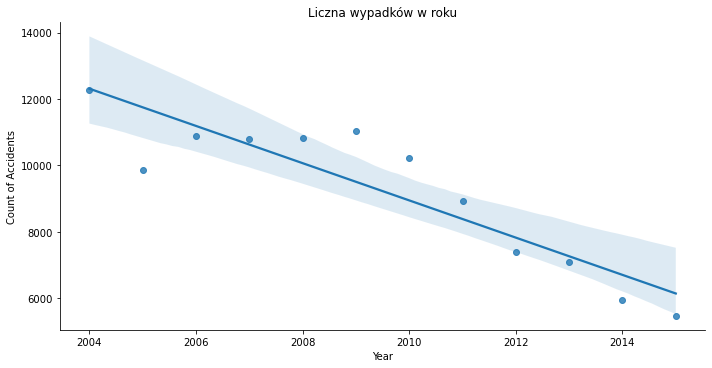

In [22]:

regplot_cases()

In [23]:
def categorise_injsev(row):  
    if row['INJSEV'] == 0.0:
        return 'no injury'
    elif row['INJSEV'] == 1.0:
        return 'small injury'
    elif row['INJSEV'] == 2.0:
        return 'large injury'
    elif row['INJSEV'] == 4.0:
        return 'killed'

injsev_df = df_corr.groupby(["YEAR", "INJSEV"])["CASEID"].count().reset_index()
injsev_df = injsev_df.rename(columns={"CASEID": "Liczba wypadków", "YEAR": "Rok"})
injsev_df['Injury Severity'] = injsev_df.apply(lambda row: categorise_injsev(row), axis=1)
injsev_df

Rok  INJSEV  Liczba wypadków Injury Severity
0   2004     0.0             4250       no injury
1   2004     1.0             4475    small injury
2   2004     2.0             2729    large injury
3   2004     4.0              417          killed
4   2005     0.0             3042       no injury
5   2005     1.0             3325    small injury
6   2005     2.0             2638    large injury
7   2005     4.0              503          killed
8   2006     0.0             3484       no injury
9   2006     1.0             3594    small injury
10  2006     2.0             2844    large injury
11  2006     4.0              560          killed
12  2007     0.0             3719       no injury
13  2007     1.0             3507    small injury
14  2007     2.0             2712    large injury
15  2007     4.0              486          killed
16  2008     0.0             4120       no injury
17  2008     1.0             3842    small injury
18  2008     2.0             2068    large injury
19  2008     4.0              342          killed
20  2009     0.0             4331       no injury
21  2009     1.0             3939    small injury
22  2009     2.0             1937    large injury
23  2009     4.0              353          killed
24  2010     0.0             4039       no injury
25  2010     1.0             3785    small injury
26  2010     2.0             1663    large injury
27  2010     4.0              306          killed
28  2011     0.0             3449       no injury
29  2011     1.0             3289    small injury
30  2011     2.0             1538    large injury
31  2011     4.0              273          killed
32  2012     0.0             2770       no injury
33  2012     1.0             2751    small injury
34  2012     2.0             1308    large injury
35  2012     4.0              275          killed
36  2013     0.0             2710       no injury
37  2013     1.0             2590    small injury
38  2013     2.0             1252    large injury
39  2013     4.0              280          killed
40  2014     0.0             2278       no injury
41  2014     1.0             2134    small injury
42  2014     2.0             1062    large injury
43  2014     4.0              257          killed
44  2015     0.0             2090       no injury
45  2015     1.0             1963    small injury
46  2015     2.0              956    large injury
47  2015     4.0              241          killed

In [24]:
def regplot_injsev():
    g=sns.lmplot(data=injsev_df,
                x="Rok",
                y="Liczba wypadków",
                aspect=2,
                hue="Injury Severity"
                ).set(title='Liczba wypadków wg kategorii obrażeń')
    plt.xlabel('Year')
    plt.ylabel('Count of Accidents')

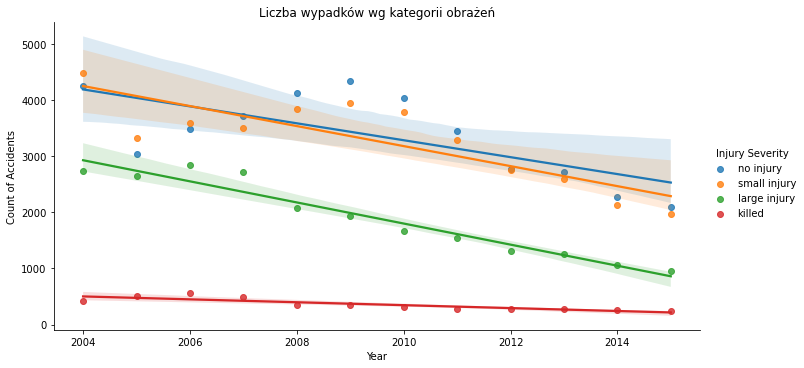

In [25]:
regplot_injsev()

In [26]:
occ=pd.read_csv("./occupants_cat_z_bagfail.csv")
veh=pd.read_csv("./vehicles_car_age.csv")
veh_occ_merge=veh.merge(occ, on = ["CASEID","PSU","YEAR"])

In [27]:
veh_occ_merge = veh_occ_merge.drop('CASEID', axis=1) 

In [28]:
def heat_corr_all():
    f,ax = plt.subplots(figsize=(13,10))
    sns.heatmap(veh_occ_merge.corr(), annot=True, linewidths=1, fmt='.2f', ax=ax, cmap="turbo", annot_kws={'fontsize':9})
    pass


## Korelacja zależności czynników w połączonych tabelach OCCUPANTS i VEHICLES

In [29]:
heat_corr_all()

### Dalsza analiza ilości wypadków w poszczególnych  latach (2004 do 2015) pokazuje, że nastąpił ich równomierny spadek  w każdej z kategorii 

In [30]:
yr=pd.read_csv("./year.csv")
yr.head(30)

CASEID    PSU    AGE  BAGAVAIL  BAGFAIL  CHTYPE  HEIGHT  INJSEV  MANUSE  \
0    12274  12274  12005     11501    10507   12273   10057   11871   10811   
1     9861   9861   9690      9175     8371    9858    7893    9508    8579   
2    10898  10898  10671      9922     9127   10895    8824   10482    9468   
3    10808  10808  10577      9804     8811   10805    8666   10424    9355   
4    10831  10831  10624     10091     9108   10831    8678   10372    9741   
5    11025  11025  10692      6666     5824    7124    6270   10560    6397   
6    10212  10212   9869      5745     5039    6208    5306    9793    5510   
7     8938   8938   8702      4834     4235    5196    4417    8549    4651   
8     7396   7396   7168      3329     2936    4070    2820    7104    3223   
9     7083   7083   6786      3228     2810    3797    2965    6832    3158   
10    5955   5955   5736      2885     2578    3242    2765    5731    2839   
11    5478   5478   5308      2527     2143    2891    2284    5250    2438   

    OCCNO   ROLE  SEATPOS    SEX  WEIGHT  HOSPSTAY  TREATMNT  YEAR  
0   12273  12273    12213  12089   10146     11665     12012  2004  
1    9858   9858     9815   9759    7973      9321      9641  2005  
2   10895  10893    10853  10783    8977     10361     10657  2006  
3   10805  10805    10775  10679    8813     10252     10589  2007  
4   10831  10831    10805  10716    8850     10376     10586  2008  
5   11023  11023     7112  10850    6481      6861      6996  2009  
6   10210  10210     6205  10029    5464      5996      6091  2010  
7    8937   8937     5207   8776    4586      4982      5137  2011  
8    7396   7390     7310   7267    3039      3835      3991  2012  
9    7082   7079     7010   6934    3064      3644      3741  2013  
10   5954   5954     5888   5853    2823      3144      3199  2014  
11   5477   5475     5419   5355    2320      2736      2827  2015

In [31]:
yr.set_index('YEAR')

CASEID    PSU    AGE  BAGAVAIL  BAGFAIL  CHTYPE  HEIGHT  INJSEV  MANUSE  \
YEAR                                                                            
2004   12274  12274  12005     11501    10507   12273   10057   11871   10811   
2005    9861   9861   9690      9175     8371    9858    7893    9508    8579   
2006   10898  10898  10671      9922     9127   10895    8824   10482    9468   
2007   10808  10808  10577      9804     8811   10805    8666   10424    9355   
2008   10831  10831  10624     10091     9108   10831    8678   10372    9741   
2009   11025  11025  10692      6666     5824    7124    6270   10560    6397   
2010   10212  10212   9869      5745     5039    6208    5306    9793    5510   
2011    8938   8938   8702      4834     4235    5196    4417    8549    4651   
2012    7396   7396   7168      3329     2936    4070    2820    7104    3223   
2013    7083   7083   6786      3228     2810    3797    2965    6832    3158   
2014    5955   5955   5736      2885     2578    3242    2765    5731    2839   
2015    5478   5478   5308      2527     2143    2891    2284    5250    2438   

      OCCNO   ROLE  SEATPOS    SEX  WEIGHT  HOSPSTAY  TREATMNT  
YEAR                                                            
2004  12273  12273    12213  12089   10146     11665     12012  
2005   9858   9858     9815   9759    7973      9321      9641  
2006  10895  10893    10853  10783    8977     10361     10657  
2007  10805  10805    10775  10679    8813     10252     10589  
2008  10831  10831    10805  10716    8850     10376     10586  
2009  11023  11023     7112  10850    6481      6861      6996  
2010  10210  10210     6205  10029    5464      5996      6091  
2011   8937   8937     5207   8776    4586      4982      5137  
2012   7396   7390     7310   7267    3039      3835      3991  
2013   7082   7079     7010   6934    3064      3644      3741  
2014   5954   5954     5888   5853    2823      3144      3199  
2015   5477   5475     5419   5355    2320      2736      2827

In [32]:
yr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   CASEID    12 non-null     int64
 1   PSU       12 non-null     int64
 2   AGE       12 non-null     int64
 3   BAGAVAIL  12 non-null     int64
 4   BAGFAIL   12 non-null     int64
 5   CHTYPE    12 non-null     int64
 6   HEIGHT    12 non-null     int64
 7   INJSEV    12 non-null     int64
 8   MANUSE    12 non-null     int64
 9   OCCNO     12 non-null     int64
 10  ROLE      12 non-null     int64
 11  SEATPOS   12 non-null     int64
 12  SEX       12 non-null     int64
 13  WEIGHT    12 non-null     int64
 14  HOSPSTAY  12 non-null     int64
 15  TREATMNT  12 non-null     int64
 16  YEAR      12 non-null     int64
dtypes: int64(17)
memory usage: 1.7 KB


In [33]:
cM= yr.corr()
cM

CASEID       PSU       AGE  BAGAVAIL   BAGFAIL    CHTYPE  \
CASEID    1.000000  1.000000  0.999712  0.903276  0.895081  0.896727   
PSU       1.000000  1.000000  0.999712  0.903276  0.895081  0.896727   
AGE       0.999712  0.999712  1.000000  0.911748  0.903857  0.905366   
BAGAVAIL  0.903276  0.903276  0.911748  1.000000  0.999620  0.998977   
BAGFAIL   0.895081  0.895081  0.903857  0.999620  1.000000  0.999048   
CHTYPE    0.896727  0.896727  0.905366  0.998977  0.999048  1.000000   
HEIGHT    0.917807  0.917807  0.925347  0.998267  0.997164  0.996280   
INJSEV    0.999871  0.999871  0.999655  0.906755  0.898806  0.900461   
MANUSE    0.904481  0.904481  0.912854  0.999708  0.999117  0.998855   
OCCNO     1.000000  1.000000  0.999711  0.903245  0.895048  0.896693   
ROLE      1.000000  1.000000  0.999712  0.903279  0.895078  0.896702   
SEATPOS   0.736582  0.736582  0.746674  0.921419  0.927266  0.933447   
SEX       0.999920  0.999920  0.999872  0.907477  0.899454  0.901131   
WEIGHT    0.923551  0.923551  0.930909  0.997826  0.996458  0.996040   
HOSPSTAY  0.900576  0.900576  0.909007  0.999235  0.999093  0.999889   
TREATMNT  0.897889  0.897889  0.906482  0.999022  0.999044  0.999989   
YEAR     -0.906750 -0.906750 -0.913651 -0.957272 -0.958305 -0.956178   

            HEIGHT    INJSEV    MANUSE     OCCNO      ROLE   SEATPOS  \
CASEID    0.917807  0.999871  0.904481  1.000000  1.000000  0.736582   
PSU       0.917807  0.999871  0.904481  1.000000  1.000000  0.736582   
AGE       0.925347  0.999655  0.912854  0.999711  0.999712  0.746674   
BAGAVAIL  0.998267  0.906755  0.999708  0.903245  0.903279  0.921419   
BAGFAIL   0.997164  0.898806  0.999117  0.895048  0.895078  0.927266   
CHTYPE    0.996280  0.900461  0.998855  0.896693  0.896702  0.933447   
HEIGHT    1.000000  0.921030  0.998234  0.917767  0.917818  0.906646   
INJSEV    0.921030  1.000000  0.907737  0.999869  0.999867  0.743782   
MANUSE    0.998234  0.907737  1.000000  0.904453  0.904487  0.920962   
OCCNO     0.917767  0.999869  0.904453  1.000000  1.000000  0.736584   
ROLE      0.917818  0.999867  0.904487  1.000000  1.000000  0.736446   
SEATPOS   0.906646  0.743782  0.920962  0.736584  0.736446  1.000000   
SEX       0.921662  0.999815  0.908724  0.999918  0.999918  0.742195   
WEIGHT    0.999791  0.926571  0.998028  0.923514  0.923557  0.904612   
HOSPSTAY  0.997072  0.904167  0.999336  0.900544  0.900558  0.930632   
TREATMNT  0.996484  0.901614  0.998908  0.897855  0.897866  0.932563   
YEAR     -0.956496 -0.911208 -0.951955 -0.906680 -0.906654 -0.868488   

               SEX    WEIGHT  HOSPSTAY  TREATMNT      YEAR  
CASEID    0.999920  0.923551  0.900576  0.897889 -0.906750  
PSU       0.999920  0.923551  0.900576  0.897889 -0.906750  
AGE       0.999872  0.930909  0.909007  0.906482 -0.913651  
BAGAVAIL  0.907477  0.997826  0.999235  0.999022 -0.957272  
BAGFAIL   0.899454  0.996458  0.999093  0.999044 -0.958305  
CHTYPE    0.901131  0.996040  0.999889  0.999989 -0.956178  
HEIGHT    0.921662  0.999791  0.997072  0.996484 -0.956496  
INJSEV    0.999815  0.926571  0.904167  0.901614 -0.911208  
MANUSE    0.908724  0.998028  0.999336  0.998908 -0.951955  
OCCNO     0.999918  0.923514  0.900544  0.897855 -0.906680  
ROLE      0.999918  0.923557  0.900558  0.897866 -0.906654  
SEATPOS   0.742195  0.904612  0.930632  0.932563 -0.868488  
SEX       1.000000  0.927352  0.904914  0.902267 -0.910040  
WEIGHT    0.927352  1.000000  0.996925  0.996273 -0.956900  
HOSPSTAY  0.904914  0.996925  1.000000  0.999901 -0.954915  
TREATMNT  0.902267  0.996273  0.999901  1.000000 -0.956517  
YEAR     -0.910040 -0.956900 -0.954915 -0.956517  1.000000

In [34]:
df_yr = yr.drop('YEAR', axis=1)
df_yr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   CASEID    12 non-null     int64
 1   PSU       12 non-null     int64
 2   AGE       12 non-null     int64
 3   BAGAVAIL  12 non-null     int64
 4   BAGFAIL   12 non-null     int64
 5   CHTYPE    12 non-null     int64
 6   HEIGHT    12 non-null     int64
 7   INJSEV    12 non-null     int64
 8   MANUSE    12 non-null     int64
 9   OCCNO     12 non-null     int64
 10  ROLE      12 non-null     int64
 11  SEATPOS   12 non-null     int64
 12  SEX       12 non-null     int64
 13  WEIGHT    12 non-null     int64
 14  HOSPSTAY  12 non-null     int64
 15  TREATMNT  12 non-null     int64
dtypes: int64(16)
memory usage: 1.6 KB


In [35]:
yr.set_index('YEAR')

CASEID    PSU    AGE  BAGAVAIL  BAGFAIL  CHTYPE  HEIGHT  INJSEV  MANUSE  \
YEAR                                                                            
2004   12274  12274  12005     11501    10507   12273   10057   11871   10811   
2005    9861   9861   9690      9175     8371    9858    7893    9508    8579   
2006   10898  10898  10671      9922     9127   10895    8824   10482    9468   
2007   10808  10808  10577      9804     8811   10805    8666   10424    9355   
2008   10831  10831  10624     10091     9108   10831    8678   10372    9741   
2009   11025  11025  10692      6666     5824    7124    6270   10560    6397   
2010   10212  10212   9869      5745     5039    6208    5306    9793    5510   
2011    8938   8938   8702      4834     4235    5196    4417    8549    4651   
2012    7396   7396   7168      3329     2936    4070    2820    7104    3223   
2013    7083   7083   6786      3228     2810    3797    2965    6832    3158   
2014    5955   5955   5736      2885     2578    3242    2765    5731    2839   
2015    5478   5478   5308      2527     2143    2891    2284    5250    2438   

      OCCNO   ROLE  SEATPOS    SEX  WEIGHT  HOSPSTAY  TREATMNT  
YEAR                                                            
2004  12273  12273    12213  12089   10146     11665     12012  
2005   9858   9858     9815   9759    7973      9321      9641  
2006  10895  10893    10853  10783    8977     10361     10657  
2007  10805  10805    10775  10679    8813     10252     10589  
2008  10831  10831    10805  10716    8850     10376     10586  
2009  11023  11023     7112  10850    6481      6861      6996  
2010  10210  10210     6205  10029    5464      5996      6091  
2011   8937   8937     5207   8776    4586      4982      5137  
2012   7396   7390     7310   7267    3039      3835      3991  
2013   7082   7079     7010   6934    3064      3644      3741  
2014   5954   5954     5888   5853    2823      3144      3199  
2015   5477   5475     5419   5355    2320      2736      2827

In [36]:
yr_ind=yr.set_index('YEAR')

def heatmap_corr():
    sns.set(rc={'figure.figsize':(15,11)}) # okrślenie rozmiaru rysunku
    color_map = sns.diverging_palette(240, 10, n=10) # wybór mapy kolorów
   
    sns.heatmap(yr_ind,vmin=0.,vmax=12000.,cmap=color_map,square=True) # wykonanie wykresu
    pass


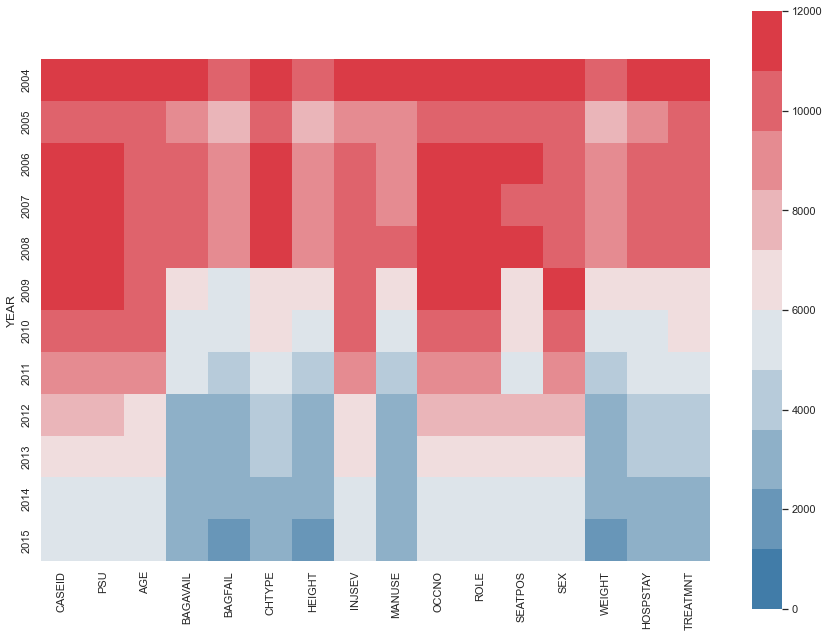

In [37]:
heatmap_corr()

In [38]:
dfo=pd.read_csv("./occupants_cat_z_bagfail.csv")
dfo.describe()

PSU           YEAR            AGE      BAGAVAIL  \
count  110759.000000  110759.000000  107828.000000  79707.000000   
mean       42.613332    2008.776957       3.157714      0.741779   
std        29.074442       3.268448       1.479447      0.437659   
min         2.000000    2004.000000       1.000000      0.000000   
25%        11.000000    2006.000000       2.000000      0.000000   
50%        45.000000    2009.000000       3.000000      1.000000   
75%        74.000000    2011.000000       4.000000      1.000000   
max        82.000000    2015.000000       6.000000      1.000000   

            BAGFAIL        CHTYPE        HEIGHT         INJSEV        MANUSE  \
count  71489.000000  87190.000000  70945.000000  106476.000000  76170.000000   
mean       0.745625      0.145005      3.704983       0.955896      1.785585   
std        0.440812      0.897707      0.833575       0.975968      0.410419   
min        0.000000      0.000000      1.000000       0.000000      1.000000   
25%        0.000000      0.000000      3.000000       0.000000      2.000000   
50%        1.000000      0.000000      4.000000       1.000000      2.000000   
75%        1.000000      0.000000      4.000000       2.000000      2.000000   
max        2.000000      8.000000      6.000000       4.000000      2.000000   

               OCCNO           ROLE       SEATPOS            SEX  \
count  110741.000000  110728.000000  98612.000000  109090.000000   
mean        1.544640       1.338930      1.285371       0.462059   
std         0.977795       0.473348      0.783356       0.513523   
min         1.000000       1.000000      1.000000       0.000000   
25%         1.000000       1.000000      1.000000       0.000000   
50%         1.000000       1.000000      1.000000       0.000000   
75%         2.000000       2.000000      1.000000       1.000000   
max        19.000000       2.000000      6.000000       2.000000   

             WEIGHT      HOSPSTAY      TREATMNT        STRATIF  
count  72536.000000  83173.000000  85467.000000  110756.000000  
mean       4.109118      1.059731      2.252589       3.459000  
std        1.134744      0.334376      2.095979       1.267495  
min        1.000000      1.000000      0.000000       1.000000  
25%        3.000000      1.000000      0.000000       2.000000  
50%        4.000000      1.000000      3.000000       4.000000  
75%        5.000000      1.000000      4.000000       4.000000  
max        7.000000      5.000000      8.000000       5.000000


## Analiza awaryjności systemu poduszek powietrznych  - BAGFAIL

   ### 0 - brak poduszki 
   
   ### 1- poduszka zadziałała 
   
   ### 2 - awaria systemu airbag

In [39]:
dfo.groupby(['YEAR','BAGFAIL'])['INJSEV','BAGFAIL'].count().head(42)

C:\Users\XPS\AppData\Local\Temp/ipykernel_10700/2106176001.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dfo.groupby(['YEAR','BAGFAIL'])['INJSEV','BAGFAIL'].count().head(42)


INJSEV  BAGFAIL
YEAR BAGFAIL                 
2004 0.0        3861     4042
     1.0        6266     6425
     2.0          40       40
2005 0.0        2888     3021
     1.0        5175     5322
     2.0          27       28
2006 0.0        2948     3089
     1.0        5803     6016
     2.0          22       22
2007 0.0        2596     2695
     1.0        5906     6100
     2.0          15       16
2008 0.0        2259     2401
     1.0        6461     6693
     2.0          14       14
2009 0.0         840      877
     1.0        4750     4933
     2.0          14       14
2010 0.0         693      744
     1.0        4141     4286
     2.0           9        9
2011 0.0         435      476
     1.0        3590     3754
     2.0           5        5
2012 0.0         349      364
     1.0        2476     2565
     2.0           7        7
2013 0.0         281      293
     1.0        2430     2511
     2.0           6        6
2014 0.0         177      194
     1.0        2286     2379
     2.0           5        5
2015 0.0         148      155
     1.0        1895     1988

In [40]:
yearly_bagfail=dfo.groupby(["BAGFAIL"])['BAGFAIL'].count()/dfo.shape[0]
yearly_bagfail

BAGFAIL
0.0    0.165684
1.0    0.478264
2.0    0.001499
Name: BAGFAIL, dtype: float64

In [41]:
bgfq=pd.read_csv("./BAGFAIL_Q.csv",sep=';')
bgfq.head(10)

YEAR  BAGFAIL  BAGFAIL_Q
0  2004      0.0       4042
1  2004      1.0       6425
2  2004      2.0         40
3  2005      0.0       3021
4  2005      1.0       5322
5  2005      2.0         28
6  2006      0.0       3089
7  2006      1.0       6016
8  2006      2.0         22
9  2007      0.0       2695

In [42]:
def categorise_injsev(row):  
    if row['INJSEV'] == 0.0:
        return 'no injury'
    elif row['INJSEV'] == 1.0:
        return 'small injury'
    elif row['INJSEV'] == 2.0:
        return 'large injury'
    elif row['INJSEV'] == 4.0:
        return 'killed'
    
def categorise_bagfail(row):  
    if row['BAGFAIL'] == 0.0:
        return 'no airbag'
    elif row['BAGFAIL'] == 1.0:
        return 'no failure'
    elif row['BAGFAIL'] == 2.0:
        return 'failure'
    
dfo['Injury Severity'] = dfo.apply(lambda row: categorise_injsev(row), axis=1)
bgfq['Airbag System Failure'] = bgfq.apply(lambda row: categorise_bagfail(row), axis=1)

In [69]:
def catplot_injsev_bagfail():
    g = sns.catplot(data=dfo, x='YEAR', col="BAGFAIL", hue="Injury Severity", kind='count',aspect=0.8,height=12, sharey = True)
    g.set_axis_labels("YEAR", "Airbag cases count",fontsize=24)
    g._legend.set_title('INJSEV')    
    g.set_titles('{col_name}')
    g.fig.suptitle('Przypadki awarii poduszki(0-brak,1 -poduszka zadziałała, 2-awaria) przez lata w stosunku do typu wydarzenia', y=1.05, fontsize=24, fontweight='semibold');

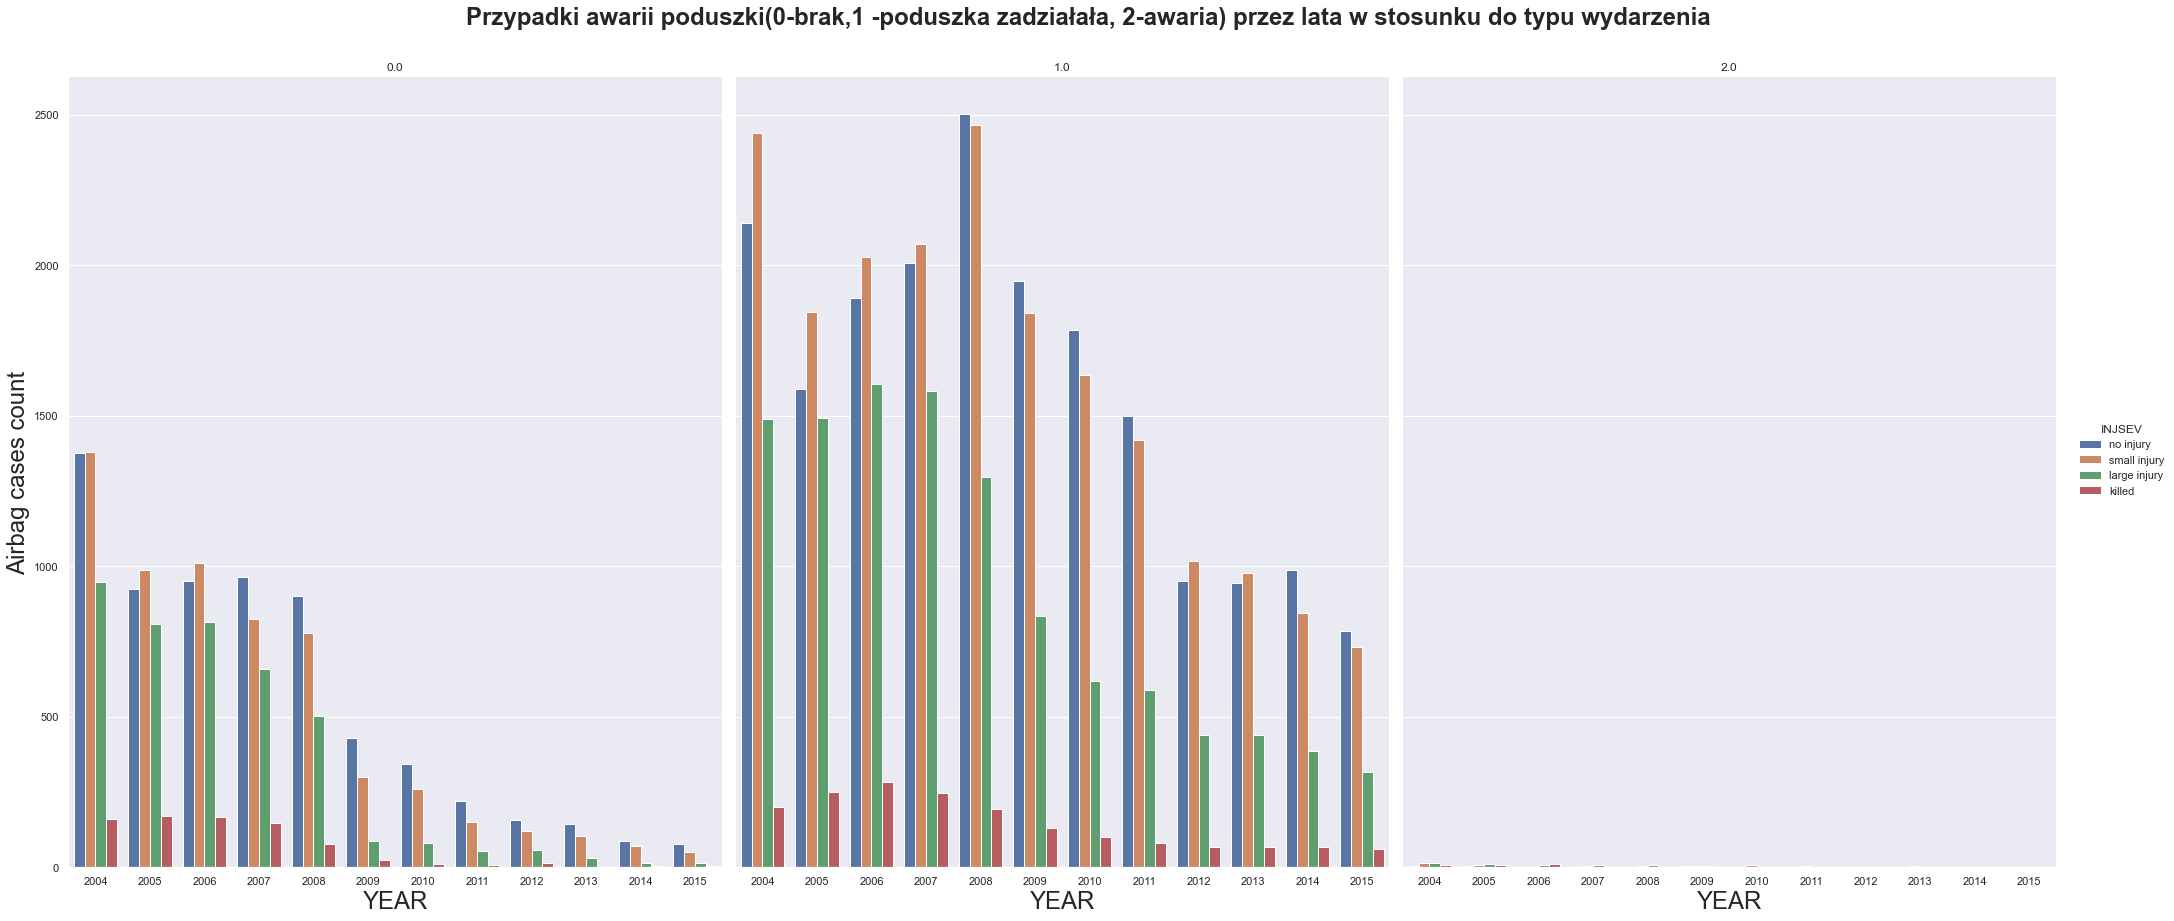

In [70]:
catplot_injsev_bagfail()

In [45]:
def lmplot_bagfail():
    g=sns.lmplot(data=bgfq[((bgfq['BAGFAIL'] == 0)| (bgfq['BAGFAIL'] == 1) | (bgfq['BAGFAIL'] == 2))],
                x="YEAR",
                y="BAGFAIL_Q",
                aspect=2, 
                hue='Airbag System Failure',
                )
    g.fig.suptitle('Zliczenia przypadków awarii poduszki powietrznej w poszczególnych latach', y=1.05, fontsize=18, fontweight='semibold');
    plt.xlabel('Year')
    plt.ylabel('Airbag cases count')
    

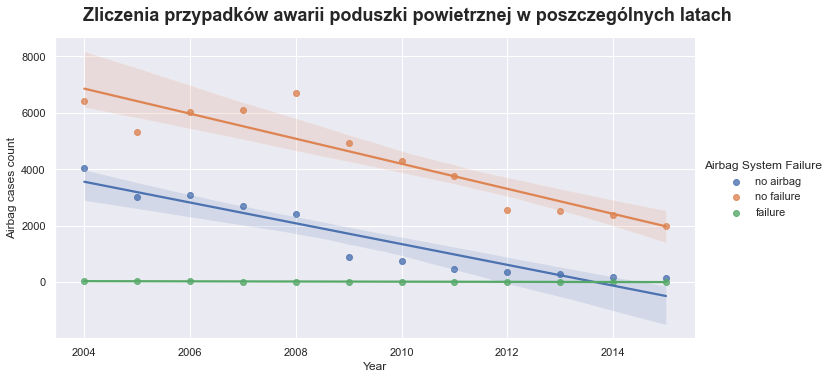

In [46]:
lmplot_bagfail()

In [47]:
#%cd "D:\GIT HUBy\02code brakers\jdszr7-code-breakers\projekt python\"
#dfo['Injury Severity'] = dfo.apply(lambda row: categorise_injsev(row), axis=1)
l_trend=pd.read_csv("./linia_trendu_bagfail.csv",sep=';')
l_trend
yearly_bagfail=l_trend.groupby(["YEAR","BAGFAIL"])['BAGFAIL_sum'].sum()/dfo.shape[0]
l_trend['Air Bag System Failure'] = l_trend.apply(lambda row: categorise_bagfail(row), axis=1)

def trends_bagfail():
    g=sns.lmplot(data=l_trend[((l_trend['BAGFAIL'] == 0)| (l_trend['BAGFAIL'] == 1) | (l_trend['BAGFAIL'] == 2))],
            x="YEAR",
            y="BAGFAIL_ratio",
            aspect=2, 
            hue='Air Bag System Failure')
    g.fig.suptitle('Stosunek liczby awarii/poprawnego działania/braku poduszki powietrznej do liczby wypadków w poszczególnych latach', y=1.05, fontsize=18, fontweight='semibold');
    plt.ylabel('Accidents with airbag cases ratio')


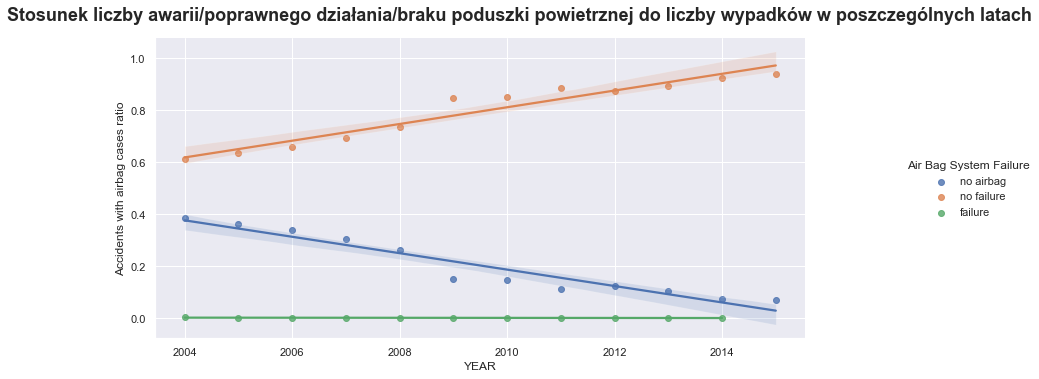

In [48]:
trends_bagfail()

In [49]:
dfo=pd.read_csv("./occupants_cat_z_bagfail.csv")
cases_nr = dfo.shape[0]
cases_nr

110759

In [50]:
bagfail_yearly=dfo.groupby(["YEAR",'BAGFAIL'],dropna=True)['YEAR'].apply(lambda dfo: dfo.count() / cases_nr).to_frame(name = 'count').reset_index()


In [51]:
#%cd "D:\GIT HUBy\02code brakers\jdszr7-code-breakers\projekt python"
yr=pd.read_csv("./year.csv")
yr.head(20)

CASEID    PSU    AGE  BAGAVAIL  BAGFAIL  CHTYPE  HEIGHT  INJSEV  MANUSE  \
0    12274  12274  12005     11501    10507   12273   10057   11871   10811   
1     9861   9861   9690      9175     8371    9858    7893    9508    8579   
2    10898  10898  10671      9922     9127   10895    8824   10482    9468   
3    10808  10808  10577      9804     8811   10805    8666   10424    9355   
4    10831  10831  10624     10091     9108   10831    8678   10372    9741   
5    11025  11025  10692      6666     5824    7124    6270   10560    6397   
6    10212  10212   9869      5745     5039    6208    5306    9793    5510   
7     8938   8938   8702      4834     4235    5196    4417    8549    4651   
8     7396   7396   7168      3329     2936    4070    2820    7104    3223   
9     7083   7083   6786      3228     2810    3797    2965    6832    3158   
10    5955   5955   5736      2885     2578    3242    2765    5731    2839   
11    5478   5478   5308      2527     2143    2891    2284    5250    2438   

    OCCNO   ROLE  SEATPOS    SEX  WEIGHT  HOSPSTAY  TREATMNT  YEAR  
0   12273  12273    12213  12089   10146     11665     12012  2004  
1    9858   9858     9815   9759    7973      9321      9641  2005  
2   10895  10893    10853  10783    8977     10361     10657  2006  
3   10805  10805    10775  10679    8813     10252     10589  2007  
4   10831  10831    10805  10716    8850     10376     10586  2008  
5   11023  11023     7112  10850    6481      6861      6996  2009  
6   10210  10210     6205  10029    5464      5996      6091  2010  
7    8937   8937     5207   8776    4586      4982      5137  2011  
8    7396   7390     7310   7267    3039      3835      3991  2012  
9    7082   7079     7010   6934    3064      3644      3741  2013  
10   5954   5954     5888   5853    2823      3144      3199  2014  
11   5477   5475     5419   5355    2320      2736      2827  2015


## Analiza użycia pasów bezpieczeństwa  - MANUSE
   
   ### 1- pasy niezapięte
   
   ### 2 - pasy zapięte

In [52]:
#dfo=pd.read_csv("./occupants_cat_z_bagfail.csv")
dfo=pd.read_csv("occupants_cat_z_bagfail.csv")
dfo['Injury Severity'] = dfo.apply(lambda row: categorise_injsev(row), axis=1)


In [53]:
def catplot_year_manuse_injsev():
    g = sns.catplot(data=dfo, x='YEAR', col="MANUSE", hue='Injury Severity', kind='count',aspect=0.8,height=10, sharey = True)   
    g.set_axis_labels("Year", "Manual Belt System Use",fontsize=24)
    g._legend.set_title('Injury Severity')    
    g.set_titles('{col_name}')
    g.fig.suptitle('Użycie pasów: 1 - niezapięte;  2 - zapięte', y=1.05, fontsize=24, fontweight='semibold');

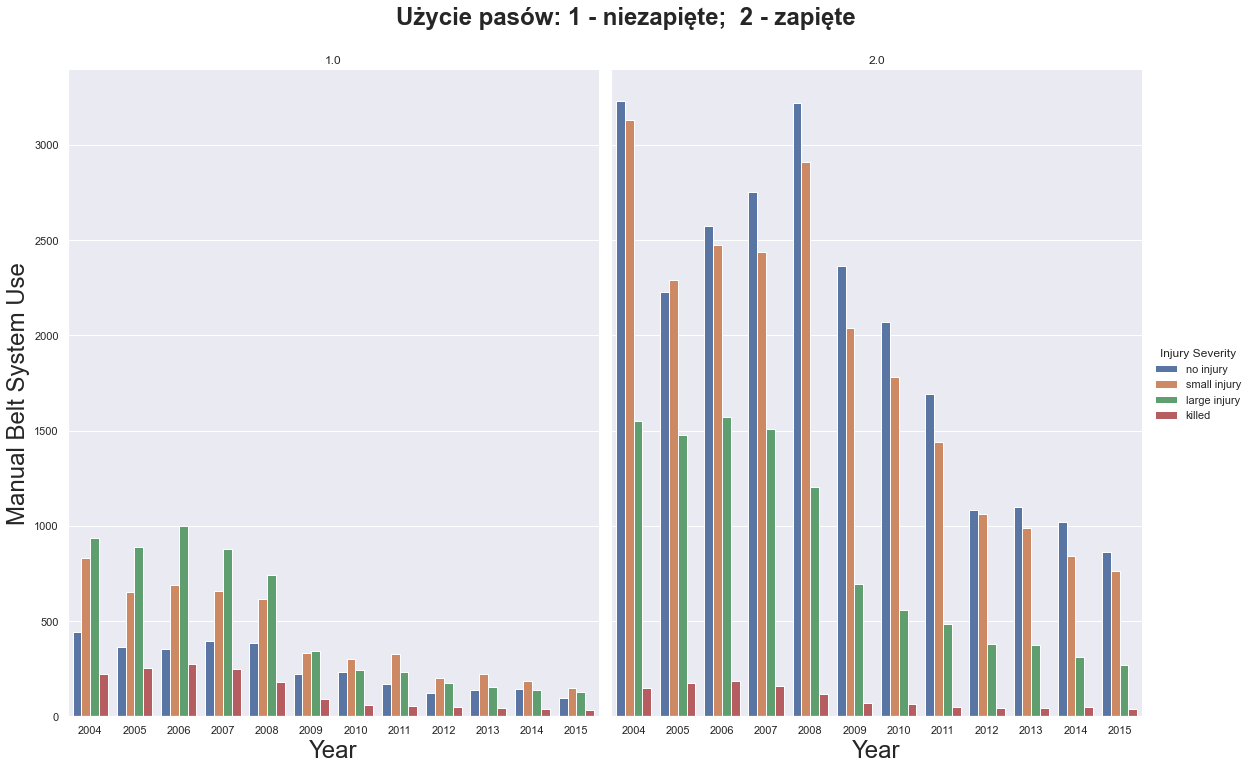

In [54]:
catplot_year_manuse_injsev();

In [55]:
yearly_manuse=dfo.groupby(["MANUSE"])['MANUSE'].count()/dfo.shape[0]
yearly_manuse

MANUSE
1.0    0.147455
2.0    0.540254
Name: MANUSE, dtype: float64

In [56]:
%cd "D:\PYTHON UBER"
manuse=pd.read_csv("./MANUSE_Q.csv",sep=';')
manuse

[WinError 2] Nie można odnaleźć określonego pliku: 'D:\\PYTHON UBER'
C:\Users\XPS\Desktop\JDSZR7\jdszr7-code-breakers\projekt python


YEAR  MANUSE  MANUSE_Q
0   2004     1.0      2514
1   2004     2.0      8297
2   2005     1.0      2245
3   2005     2.0      6334
4   2006     1.0      2421
5   2006     2.0      7047
6   2007     1.0      2264
7   2007     2.0      7091
8   2008     1.0      2020
9   2008     2.0      7721
10  2009     1.0      1030
11  2009     2.0      5367
12  2010     1.0       883
13  2010     2.0      4627
14  2011     1.0       832
15  2011     2.0      3819
16  2012     1.0       571
17  2012     2.0      2652
18  2013     1.0       588
19  2013     2.0      2570
20  2014     1.0       536
21  2014     2.0      2303
22  2015     1.0       428
23  2015     2.0      2010

In [57]:
def categorise_manuse(row):  
    if row['MANUSE'] == 1:
        return 'unfastened' 
    elif row['MANUSE'] == 2:
        return 'fastened' 
    
manuse['Manual Belt System Use'] = manuse.apply(lambda row: categorise_manuse(row), axis=1)

def lmplot_year_manuse():
    g=sns.lmplot(data=manuse[((manuse['MANUSE'] == 1) | (manuse['MANUSE'] == 2))],         #1 - not used;  2 - used
            x="YEAR",
            y="MANUSE_Q",
            aspect=2, 
            hue='Manual Belt System Use')
    g.fig.suptitle('Liczba wypadków w kategoriach pasy zapięte i niezapięte', y=1.05, fontsize=16, fontweight='semibold');
    plt.ylabel('Accidents with Manual Belt System Use count')


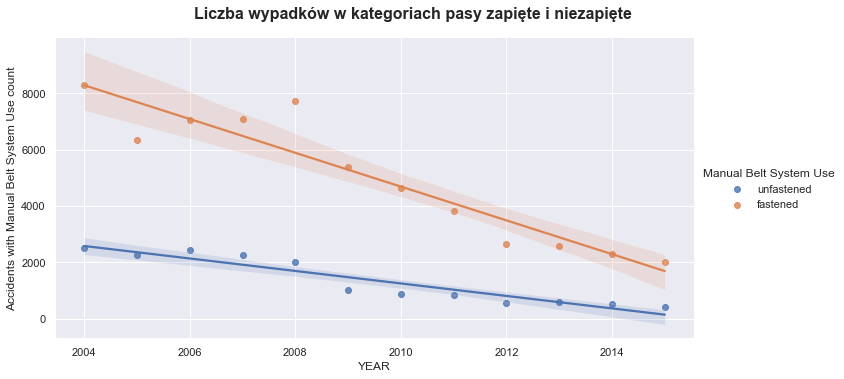

In [58]:
lmplot_year_manuse();

In [59]:
#%cd "D:\GIT HUBy\02code brakers\jdszr7-code-breakers\projekt python\"
l_trend_m=pd.read_csv("./linia_trendu_manuse.csv",sep=';')
l_trend_m['Manual Belt System Use'] = l_trend_m.apply(lambda row: categorise_manuse(row), axis=1)
def trend_manuse():
    g=sns.lmplot(data=l_trend_m[(( l_trend_m['MANUSE'] == 1) | (l_trend_m['MANUSE'] == 2))],
            x="YEAR",
            y="MANUSE_ratio",
            aspect=2, 
            hue='Manual Belt System Use')
    g.fig.suptitle('Stosunek liczby wypadków z zapiętymi i niezapiętymi pasami bezpieczeństwa \n do całkowitej liczby wypadków w poszczególnych latach ', y=1.05, fontsize=16, fontweight='semibold');
    plt.ylabel('Accidents with Manual Belt System Use ratio')

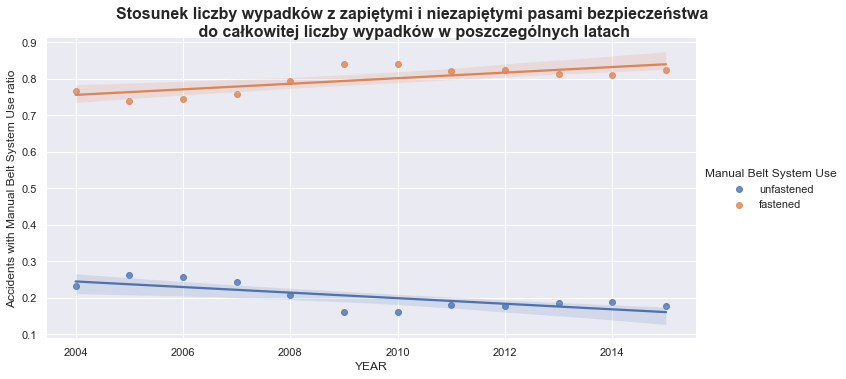

In [60]:
trend_manuse()

In [61]:
veh=pd.read_csv("./vehicles_car_age.csv")

In [62]:
veh_occ_merge=veh.merge(dfo, on = ["CASEID","PSU","YEAR"])

In [63]:
veh_occ_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218534 entries, 0 to 218533
Data columns (total 24 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CASEID           218534 non-null  object 
 1   PSU              218534 non-null  int64  
 2   YEAR             218534 non-null  int64  
 3   BODYTYPE         218173 non-null  float64
 4   MAKE             217307 non-null  float64
 5   DVTOTAL          115049 non-null  float64
 6   MODELYR          217020 non-null  float64
 7   CARAGE           217020 non-null  float64
 8   AGE              212859 non-null  float64
 9   BAGAVAIL         157030 non-null  float64
 10  BAGFAIL          140547 non-null  float64
 11  CHTYPE           172714 non-null  float64
 12  HEIGHT           139626 non-null  float64
 13  INJSEV           210141 non-null  float64
 14  MANUSE           149961 non-null  float64
 15  OCCNO            218509 non-null  float64
 16  ROLE             218491 non-null  floa

In [64]:

    
manuse['Manual Belt System Use'] = manuse.apply(lambda row: categorise_manuse(row), axis=1)

def lmplot_year_manuse():
    sns.lmplot(data=manuse[((manuse['MANUSE'] == 1) | (manuse['MANUSE'] == 2))],         #1 - not used;  2 - used
            x="YEAR",
            y="MANUSE_Q",
            aspect=2, 
            hue='Manual Belt System Use')

In [65]:
def stratif_heatmap():
    #dfo=pd.read_csv("./occupants_cat_z_bagfail_seatpos_new.csv")
    veh_occ_merge['STRATIF'] = pd.Categorical(veh_occ_merge['STRATIF'], 
                                                categories=[1,2,3,4,5], 
                                                ordered=True)

In [66]:
def categorise_stratif(row):  
    if row['STRATIF'] == 1:
        return 'A, B - fatal injuries' 
    elif row['STRATIF'] == 2:
        return 'J, K - serious injuries' 
    elif row['STRATIF'] == 3:
        return 'C, D - serious injuries' 
    elif row['STRATIF'] == 4:
        return 'E, F - minor injuries' 
    elif row['STRATIF'] == 5:
        return 'G, H - slight damage' 
    
veh_occ_merge['Case Stratum'] = veh_occ_merge.apply(lambda row: categorise_stratif(row), axis=1)

In [67]:
def stratif_heatmap2():
    plt.figure(figsize=(9,8))
    plt.suptitle('                                                                   Zależność rodzaju zdarzenia od rocznika samochodu',
                 fontsize=18, fontweight='semibold')

# heatmap dla role1
    plt.subplot(1, 2, 1)
    dfa = veh_occ_merge.query('ROLE == 1').groupby(["CARAGE", 'Case Stratum'])["PSU"].size().reset_index()          # ('user_type == "Customer"')
    dfa = dfa.pivot("CARAGE", 'Case Stratum',"PSU")
    sns.heatmap(dfa, cmap="BuPu")

    plt.title("Driver", y=1.015)
    plt.xlabel("Stratif")
    plt.ylabel("Category of car age")
    
    plt.subplots_adjust(left=0.0, right=1.5)

# heatmap dla role2
    plt.subplot(1, 2, 2)
    dfp = veh_occ_merge.query('ROLE == 2').groupby(["CARAGE", 'Case Stratum'])["PSU"].size().reset_index()
    dfp = dfp.pivot("CARAGE", 'Case Stratum',"PSU")
    sns.heatmap(dfp, cmap="BuPu")

    plt.title("Passenger", y=1.015)
    plt.xlabel("Stratif")
    plt.ylabel("Category of car age")

# Analiza zależności wieku samochodu od ciężkości wypadku

   ### Kategorie wiekowe samochodów
    - 1 : 0-1 rok
    - 2 : 2-3 lata
    - 3 : 4-7 lat
    - 4 : 8-12 lat
    - 5 : 13-16 lat 
    - 6 : powyżej 17 lat

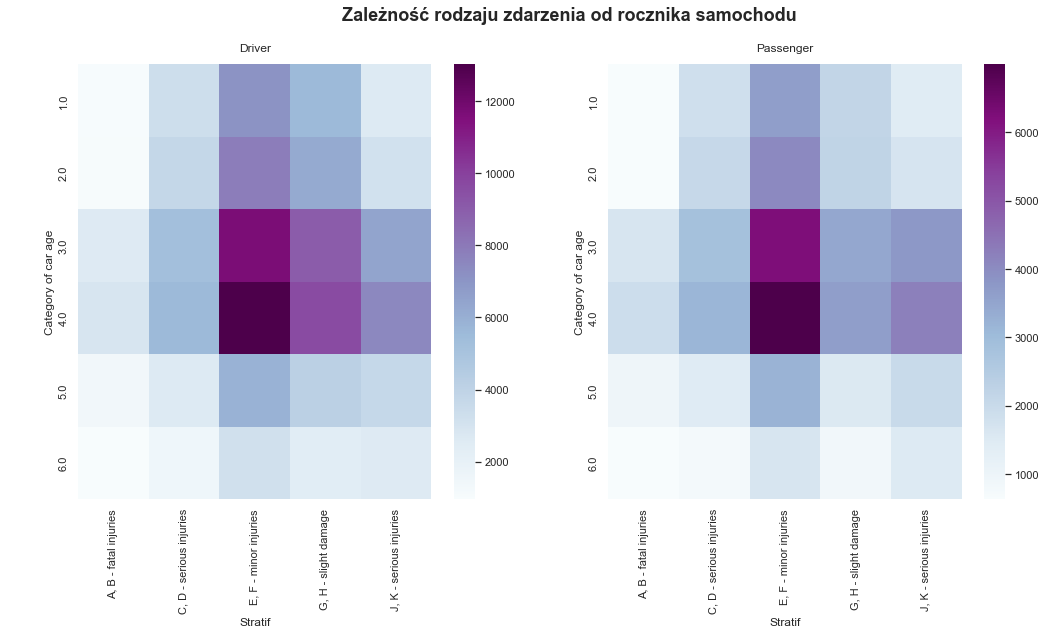

In [68]:
stratif_heatmap2()

# Wnioski

1. Widoczny jest spadek liczby wypadków w kolejnych latach, obserwacje potwierdzone w każdej z badanych kategorii.
2. Analiza kategorii awarii poduszki powietrznej wykazała wzrost stosunku prawidłowego działania poduszek powietrznych w odniesieniu do całkowitej liczny wypadków.
3. Wykazano jednoznaczną korelację między ilością i ciężkością wypadków a zapinaniem pasów bezpieczeństwa.
4. W analizowanym przedziale czasowym nastąpił wzrost użycia pasów bezpieczeństwa.
5. Wykazano, iż jazda samochodami z kategorii 3 i 4 czyli 4-7 lat i 8-12 lat charakteryzuje się największą liczbą wypadków, które przyporządkowano do kategorii ze średnimi urazami.

